In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [3]:
X = tf.range(-100, 100, 2)
y = 3 * X ** 2 + X + 5

In [4]:
train_test_split_at = 100 * 0.8

X_train = X[:int(train_test_split_at)]
y_train = y[:int(train_test_split_at)]

X_test = X[int(train_test_split_at):]
y_test = y[int(train_test_split_at):]

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name="model1")

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="mae",
    metrics=["mae", "accuracy"]
)

In [6]:
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100


3/3 [==============================] - 0s 2ms/step - loss: 7712.5156 - mae: 7712.5156 - accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 1ms/step - loss: 7711.4282 - mae: 7711.4282 - accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 1ms/step - loss: 7710.3296 - mae: 7710.3296 - accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 998us/step - loss: 7709.3452 - mae: 7709.3452 - accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 7708.2998 - mae: 7708.2998 - accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 7707.3467 - mae: 7707.3467 - accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 1ms/step - loss: 7706.3740 - mae: 7706.3740 - accuracy: 0.0000e+00
Epoch 8/100
3/3 [==============================] - 0s 1ms/step - loss: 7705.2725 - mae: 7705.2725 - accuracy: 0.0000e+00
Epoch 9/100
3/3 [=========================

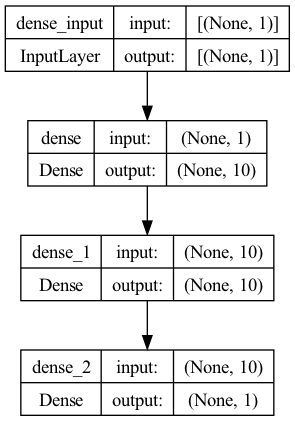

In [7]:
plot_model(model, show_shapes=True)

1/1 [==============================] - 0s 12ms/step


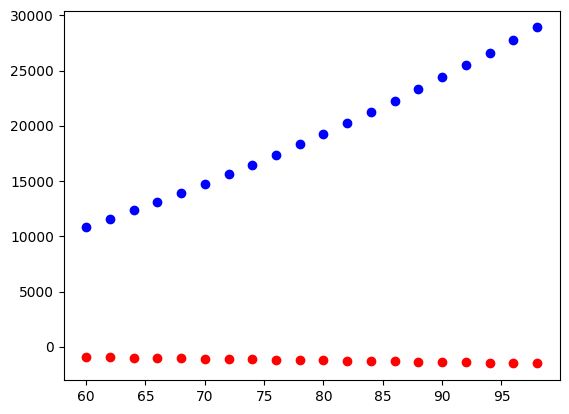

In [12]:
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, c="b")
plt.scatter(X_test, y_pred, c="r")

In [31]:
squeezed_y_pred = tf.squeeze(y_pred)

print(y_test, "\n")

print(squeezed_y_pred, "\n")



print(tf.cast(y_test, tf.float32) - squeezed_y_pred, "\n")

mae = tf.metrics.mean_absolute_error(
    y_pred=squeezed_y_pred,
    y_true=y_test
)

print(mae)

tf.Tensor(
[10865 11599 12357 13139 13945 14775 15629 16507 17409 18335 19285 20259
 21257 22279 23325 24395 25489 26607 27749 28915], shape=(20,), dtype=int32) 

tf.Tensor(
[ -918.1769   -949.17975  -980.1826  -1011.18555 -1042.1885  -1073.1914
 -1104.1943  -1135.1973  -1166.2002  -1197.203   -1228.206   -1259.2089
 -1290.2118  -1321.2147  -1352.2177  -1383.2207  -1414.2236  -1445.2263
 -1476.2294  -1507.2323 ], shape=(20,), dtype=float32) 

tf.Tensor(
[11783.177 12548.18  13337.183 14150.186 14987.188 15848.191 16733.195
 17642.197 18575.2   19532.203 20513.207 21518.209 22547.21  23600.215
 24677.217 25778.22  26903.223 28052.227 29225.229 30422.232], shape=(20,), dtype=float32) 

tf.Tensor(20418.705, shape=(), dtype=float32)


In [32]:
mse = tf.metrics.mean_squared_error(
    y_true=y_test,
    y_pred=squeezed_y_pred
)

mae ** 2, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=416923520.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=449048580.0>)